# Imports, helper functions and data preparation

In [62]:
import re
import os
from collections import defaultdict
import numpy as np
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt
from IPython.display import Markdown as md

def get_texts_dataset(dataset_path):
    filenames = os.listdir(dataset_path)
    texts = []
    text_names = []
    for filename in filenames:
        file_path = os.path.join(dataset_path, filename)
        with open(file_path) as current_file:
            texts.append(current_file.read())
            text_names.append(filename)
    return text_names, texts

def count_by_year(file_labels,counts_by_document):
    counts_by_year = defaultdict(lambda: 0)
    for fname, count in zip(file_labels, counts_by_document):
        key = fname.split("_")[0]
        counts_by_year[key] += count
    return counts_by_year

def pprint_dict(dict_to_print):
    content = dict_to_print.items()
    sorted_content = sorted(content, key=lambda x: x[0])
    print("{")
    for key, value in sorted_content:
        print("  {0}: {1}".format(key, value))
    print("}")

data_dir = os.path.join("..","data", "ustawy")
file_labels, dataset = get_texts_dataset(data_dir)

# Building regular expressions (task 1-2)|

In [87]:
unit = r"(art[\.\n\s]|ust[\.\n\s]|pkt[\.\n\s]|lit|zdanie|§|rozdzia[lł]|dzia[lł])"
unit = r"(art[\.\n\s]|ust[\.\n\s]|pkt[\.\n\s]|lit|zdanie|§|rozdzia[lł]|dzia[lł])"
dodaje_sie = r"(dodaje[\s\n]*si[eę][\s\n]*{UNIT})".format(UNIT=unit)
base = r"skre[sś]la[\s\n]*si[eę]"
skresla_sie = r"({UNIT}([\s\n]*[\w-]*[\s\n]*){BASE}|{BASE}[\s\n]*{UNIT})".format(UNIT=unit, BASE=base)
otrzymuje = r"({UNIT}([\s\n]*[\w-]*[\s\n]*)otrzymuje[\s\n]*brzmienie)".format(UNIT=unit)

md("## Final regex forms\n\n"
   "### Addition of a unit\n\n```{0}```\n\n"
   "### Removal of a unit\n\n```{1}```\n\n"
   "### Change of a unit\n\n```{2}```\n\n".format(dodaje_sie, skresla_sie, otrzymuje))

## Final regex forms

### Addition of a unit

```(dodaje[\s\n]*si[eę][\s\n]*(art[\.\n\s]|ust[\.\n\s]|pkt[\.\n\s]|lit|zdanie|§|rozdzia[lł]|dzia[lł]))```

### Removal of a unit

```((art[\.\n\s]|ust[\.\n\s]|pkt[\.\n\s]|lit|zdanie|§|rozdzia[lł]|dzia[lł])([\s\n]*[\w-]*[\s\n]*)skre[sś]la[\s\n]*si[eę]|skre[sś]la[\s\n]*si[eę][\s\n]*(art[\.\n\s]|ust[\.\n\s]|pkt[\.\n\s]|lit|zdanie|§|rozdzia[lł]|dzia[lł]))```

### Change of a unit

```((art[\.\n\s]|ust[\.\n\s]|pkt[\.\n\s]|lit|zdanie|§|rozdzia[lł]|dzia[lł])([\s\n]*[\w-]*[\s\n]*)otrzymuje[\s\n]*brzmienie)```



# Occurence counts extraction (task 1-2)

In [79]:
out_dodaje_sie = map(lambda x: re.findall(dodaje_sie, x, re.IGNORECASE), dataset)
counts_dodaje_sie = list(map(lambda x: len(x), out_dodaje_sie))
counts_by_year_dodaje_sie = count_by_year(file_labels, counts_dodaje_sie)
pprint_dict(dict(counts_by_year_dodaje_sie))
print("SUM: {0}".format(sum(counts_by_year_dodaje_sie.values())))

{
  1993: 36
  1994: 109
  1995: 355
  1996: 543
  1997: 713
  1998: 234
  1999: 170
  2000: 816
  2001: 1176
  2002: 93
  2003: 1119
  2004: 1078
}
SUM: 6442


In [80]:
out_skresla_sie = map(lambda x: re.findall(skresla_sie, x, re.IGNORECASE), dataset)
counts_skresla_sie = list(map(lambda x: len(x), out_skresla_sie))
counts_by_year_skresla_sie = count_by_year(file_labels, counts_skresla_sie)
pprint_dict(dict(counts_by_year_skresla_sie))
print("SUM: {0}".format(sum(counts_skresla_sie)))

{
  1993: 17
  1994: 52
  1995: 143
  1996: 366
  1997: 443
  1998: 144
  1999: 91
  2000: 542
  2001: 441
  2002: 4
  2003: 55
  2004: 19
}
SUM: 2317


In [81]:
out_otrzymuje = map(lambda x: re.findall(otrzymuje, x, re.IGNORECASE), dataset)
counts_otrzymuje = list(map(lambda x: len(x), out_otrzymuje))
counts_by_year_otrzymuje = count_by_year(file_labels, counts_otrzymuje)
pprint_dict(dict(counts_by_year_otrzymuje))
print("SUM: {0}".format(sum(counts_otrzymuje)))

{
  1993: 58
  1994: 159
  1995: 350
  1996: 865
  1997: 1025
  1998: 283
  1999: 157
  2000: 1420
  2001: 1294
  2002: 173
  2003: 1765
  2004: 1542
}
SUM: 9091


# Plots (task 1-2)

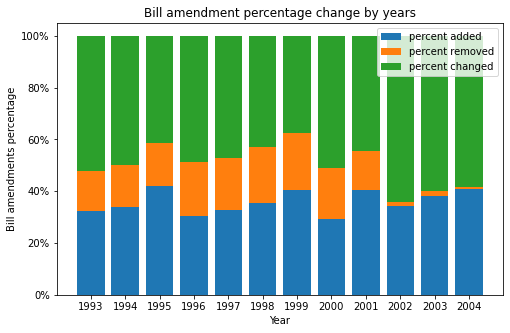

In [82]:
years = np.array(list(counts_by_year_dodaje_sie.keys()))
order = [x[0] for x in sorted(list(enumerate(years)), key=lambda x: x[1])]
c_d = np.array(list(counts_by_year_dodaje_sie.values()))
c_s = np.array(list(counts_by_year_skresla_sie.values()))
c_o = np.array(list(counts_by_year_otrzymuje.values()))
totals = np.array(c_d+c_s+c_o)
s_c_d = c_d / totals
s_c_s = c_s / totals
s_c_o = c_o / totals

fig, ax = plt.subplots(figsize=(8,5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.bar(years[order], s_c_d[order], label="percent added")
ax.bar(years[order], s_c_s[order], bottom=s_c_d[order], label="percent removed")
ax.bar(years[order], s_c_o[order], bottom=s_c_d[order] + s_c_s[order], label="percent changed")
plt.ylabel('Bill amendments percentage')
plt.xlabel('Year')
plt.title('Bill amendment percentage change by years')
plt.legend()
plt.show()

# Building regular expressions (task 4-7)

In [88]:
ustawa = r"(ustaw([aoyeęą]|a(mi|ch)|om|ie)?\W)"
ustawa_z = r"({USTAWA}(?=z[\n\s]dnia))".format(USTAWA=ustawa)
ustawa_n = r"({USTAWA}(?!z[\n\s]dnia))".format(USTAWA=ustawa)
o_ustawa = r"((?<!o[\n\s]zmianie[\n\s]){USTAWA})".format(USTAWA=ustawa)

md("## Final regex forms\n\n"
   "### Word \"ustawa\"\n\n```{0}```\n\n"
   "### Word \"ustawa\" followed by \"z dnia\"\n\n```{1}```\n\n"
   "### Word \"ustawa\" not followed by \"z dnia\"\n\n```{2}```\n\n"
   "### Word \"ustawa\" preceded by \"o zmianie\"\n\n```{3}```\n\n".format(ustawa, ustawa_z, ustawa_n,o_ustawa))

## Final regex forms

### Word "ustawa"

```(ustaw([aoyeęą]|a(mi|ch)|om|ie)?\W)```

### Word "ustawa" followed by "z dnia"

```((ustaw([aoyeęą]|a(mi|ch)|om|ie)?\W)(?=z[\n\s]dnia))```

### Word "ustawa" not followed by "z dnia"

```((ustaw([aoyeęą]|a(mi|ch)|om|ie)?\W)(?!z[\n\s]dnia))```

### Word "ustawa" preceded by "o zmianie"

```((?<!o[\n\s]zmianie[\n\s])(ustaw([aoyeęą]|a(mi|ch)|om|ie)?\W))```



# Occurence counts extraction (task 4-7)

In [97]:
out_ustawa = map(lambda x: re.findall(ustawa, x, re.IGNORECASE), dataset)
out_ustawa_z = map(lambda x: re.findall(ustawa_z, x, re.IGNORECASE), dataset)
out_ustawa_n = map(lambda x: re.findall(ustawa_n, x, re.IGNORECASE), dataset)
out_o_ustawa = map(lambda x: re.findall(o_ustawa, x, re.IGNORECASE), dataset)
counts_ustawa = sum(map(lambda x: len(x), out_ustawa))
counts_ustawa_z = sum(map(lambda x: len(x), out_ustawa_z))
counts_ustawa_n = sum(map(lambda x: len(x), out_ustawa_n))
counts_o_ustawa = sum(map(lambda x: len(x), out_o_ustawa))

md("## Occurence counts\n\n"
   "Word \"ustawa\": `{0}`\n\n"
   "Word \"ustawa\" followed by \"z dnia\": `{1}`\n\n"
   "Word \"ustawa\" not followed by \"z dnia\": `{2}`\n\n"
   "Word \"ustawa\" preceded by \"o zmianie\": `{3}`\n\n"
   "Word \"ustawa\" followed by \"z dnia and "
   "word \"ustawa\" not followed by \"z dnia counts sum is `{4}` and that equals to word \"ustawa\" counts".format(counts_ustawa, 
                                                                  counts_ustawa_z, 
                                                                  counts_ustawa_n, 
                                                                  counts_o_ustawa,
                                                                  counts_ustawa_z + counts_ustawa_n,
                                                                 ))

## Occurence counts

Word "ustawa": `25095`

Word "ustawa" followed by "z dnia": `7567`

Word "ustawa" not followed by "z dnia": `17528`

Word "ustawa" preceded by "o zmianie": `24243`

Word "ustawa" followed by "z dnia and word "ustawa" not followed by "z dnia counts sum is `25095` and that equals to word "ustawa" counts

# Plotting (task 8)

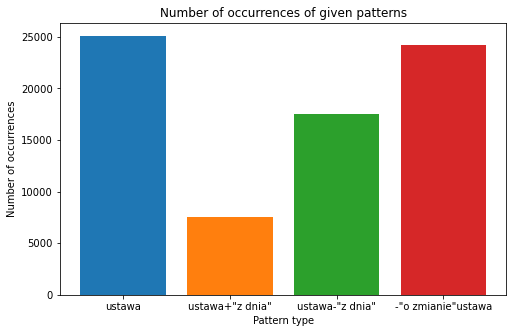

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(["ustawa"],
       [counts_ustawa])
ax.bar(["ustawa+\"z dnia\""],
       [counts_ustawa_z])
ax.bar(["ustawa-\"z dnia\""],
       [counts_ustawa_n])
ax.bar(["-\"o zmianie\"ustawa"],
       [counts_o_ustawa])
plt.ylabel('Number of occurrences')
plt.xlabel('Pattern type')
plt.title('Number of occurrences of given patterns')
plt.show()